# Übung: Aufbereitung

(start)=
## Überblick verschaffen

### Python Packete importieren und Daten laden

Python Packete importieren

In [1]:
!pip install sklearn

In [2]:
# Packete importieren
import pandas as pd
import numpy as np
import sklearn as sklearn
import pickle
from sklearn.model_selection import train_test_split

# Daten von CSV in Pandas Dataframe laden
data = pd.read_csv("../data/bikebuyers/bike_buyers.csv")
print(str(data.shape[0]) +' Datensätze geladen')

1000 Datensätze geladen


### Task 1: Anzeigen der ersten Datensätze

In der Variable data liegen die Daten in Form eines Panda Dataframe vor. Geben Sie die ersten 7 Datensätze dieses Pandas Datenframe aus. 

In [3]:
data.head(7)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes


```{tip}
Die [head-Methode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) liefert die ersten Zeilen eines Pandas Datenframe.

```

````{Dropdown} Lösung Task 1
  ```{code-block} python
  data.head(7)
  ```
`````

### Task 2: Beobachtungen aus den ersten 7 Datensätzen
* Die Merkmale Gender und Home Owner enthalten <mark> [?] </mark>  
* Die meisten Merkmale enthalten <mark> [?] </mark>  
* Die numerischen Merkmale unterscheiden sich stark in <mark> [?] </mark> 

```{Dropdown} Lösung Task 2
* Die Merkmale Gender und Home Owner enthalten fehlende Werte
* Die meisten Merkmale enthalten nicht-numerische Daten
* Die numerischen Merkmale unterscheiden sich stark in den Wertebereichen
```

### Task 3: Datenset beschreiben

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


Das Datenset besteht aus  
<mark> [?] </mark> Datensätzen  
<mark> [?] </mark> Merkmalen  
  
Die Zielvariable ist: <mark> [?] </mark>  
      
<mark> [?] </mark> Merkmale sind vom Typ Float  
<mark> [?] </mark> Merkmale sind vom Typ Integer  
<mark> [?] </mark> Merkmale sind Objekte  

```{tip}
Die [Info-Methode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) liefert eine Zusammenfassung des Pandas Datenframe.

```

````{Dropdown} Lösung Task 3
Informationen erhalten über den Aufruf der Info-Methode
  ```{code-block} python
  data.info()
  ```
Das Datenset besteht aus   
1000 Datensätzen  
12 Merkmalen  
  
Die Zielvariable ist: Purchased Bike   
  
4 Merkmale sind vom Typ Float  
1 Merkmal vom Typ Integer  
7 Merkmale sind Objekte  
````

### Beschreibung der Merkmale:
* **ID**: Eindeutige Id des Kunden
* **Marital Status**: Familienstand [Verheirated, Single]
* **Gender**: Geschlecht [Male, Female]
* **Income**: Jahreseinkommen 
* **Children**: Anzahl an Kinder
* **Education**: Bildungsstand  
[Bachelor, Partial College, High School, Graduate Degree, Partial High School]
* **Occupation**: Berufsstand  
[Professional, Skilled Manual, Clerical, Management, Manual]
* **Home Owner**: Hausbesitzer  [True, False]
* **Cars**: Anzahl an Autos
* **Commute Distance**: Pendeldistanz
* **Region**: Region [North America, Europe, Pacific]
* **Age**: Alter 
* **Fahrrad gekauft** [True, False]

### Task 4: Datentypen bestimmen

Numerische Daten:
* Diskret
    * <mark> [?] </mark>
    * <mark> [...] </mark>
* Kontinuierlich
    * <mark> [?] </mark>
    * <mark> [...] </mark>
    
Kategorische Daten:
* Nominal
    * <mark> [?] </mark>
    * <mark> [...] </mark>
* Ordinal
    * <mark> [?] </mark>
    * <mark> [...] </mark>

```{Dropdown} Lösung Task 4
Numerische Daten:
* Diskret
    * Cars
    * Children
* Kontinuierlich
    * Income
    * Age
    
Kategorische Daten:
* Nominal
    * ID
    * Marital Status
    * Gender
    * Occupation
    * Home Owner
    * Region
* Ordinal
    * Education
    * Commute Distance
```

###  Task 5: Deskriptive Statistiken erstellen

In [5]:
data.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


```{tip}
Die [Describe-Methode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)  liefert deskriptive Statistiken des Pandas Datenframe.

```

````{Dropdown} Lösung Task 5
  ```{code-block} python
  data.describe()
  ```
`````

#### Task 6: Beobachtungen notieren

* Das Einkommen der meisten Kunden (75%) liegt unter <mark> [?] </mark>.
* Die Standardabweichung des Einkommen beträgt <mark> [?] </mark>.    
* 50% der Kunden haben mehr als <mark> [?] </mark> Kinder.  
* Die Kunden besitzen im Durchschnitt <mark> [?] </mark> Autos.  
* Das Alter der Kunden variiert zwischen <mark> [?] </mark> und <mark> [?] </mark>.  
* 25% der Kunden sind älter als <mark> [?] </mark>.  

```{Dropdown} Lösung Task 6
* Das Einkommen der meisten Kunden (75%) liegt unter <mark> 24470,75 </mark>.
* Die Standardabweichung des Einkommen beträgt <mark> 31067,82 </mark>.
* 50% der Kunden haben mehr als <mark> 2 </mark> Kinder.
* Die Kunden besitzen im Durchschnitt <mark> 1,46 </mark> Autos.
* Das Alter der Kunden variiert zwischen <mark> 25 </mark> und <mark> 89 </mark>.
* 25% der Kunden sind älter als <mark> 35 </mark>.
````

## Fehlende Werte korrigieren

### Task 7: Fehlende Werte ermitteln (absolut)

Ermitteln Sie die absoulte Zahl der fehlenden Werte pro Spalte und speichern Sie diese in einer Variablen namens "missingValuesCount".

In [6]:
missingValuesCount = data.isnull().sum()
missingValuesCount

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

```{tip}
Die [isnull-Methode](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html)  liefert für jeden Wert des Pandas Datenframe einen Boolean-Wert, true oder false. True bedeutet, es handelt sich um einen fehlenden Wert.

Die [sum-Methode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) liefert die Anzahl der True Werte pro Spalte in einer Pandas Series (bei Default-Einstellung)

```

````{Dropdown} Lösung Task 7
  ```{code-block} python
  missingValuesCount = data.isnull().sum()
  missingValuesCount
  ```
````

### Task 8: Fehlende Werte ermitteln (absolut und prozentual)

Geben Sie den absoluten und prozentualen-Wert pro Spalte an. Implementieren Sie folgende Schritte
* Sortieren Sie das zuvor gespeicherte Ergebnis (missingValuesCount) in absteigender Reihenfolge und speichern Sie das Ergebnis in einer neuen Variable namens "total".
* Berechnen Sie den prozentualen Anteil der fehlenden Werte an der Gesamtzahl der der Datensätze, sortieren Sie das Ergebnis absteigend und speichern es in einer neuen Variable namens "percentage".
* Erstellen Sie einen Pandas Datenframe mit 2 Spalten. Die erste Spalte mit der Bezeichnung "Gesamt" und den Daten der Variable total und die zweite Spalte mit der Bezeichnung "Prozentual" und den Daten der Variable percentage.
* Speichern Sie den Pandas Datenframe in einer neuen Variable namens "missingData".
* Geben Sie den erstellten Pandas Datenframe aus.

In [7]:
total = missingValuesCount.sort_values(ascending=False)
percentage = (missingValuesCount/data.shape[0]*100).sort_values(ascending=False)
missingData = pd.DataFrame({'Gesamt':total, 'Prozentual':percentage})
missingData

,Gesamt,Prozentual
Gender,11,1.1
Cars,9,0.9
Age,8,0.8
Children,8,0.8
Marital Status,7,0.7
Income,6,0.6
Home Owner,4,0.4
Purchased Bike,0,0.0
Region,0,0.0
Commute Distance,0,0.0


```{tip}
Die [sort_values-Methode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) sortiert die Pandas Series anhand der enthaltenen Werte.

Die [shape-Methode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) liefert die Dimensionen eines Pandas Datenframe in einem Tuple, wobei der erste Wert, der Anzahl der Zeilen entspricht und der zweite Wert, der Anzahl der Spalten.

Unter Verwendung der [DataFrame-Methode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) und der Übergabe eines Dictionaries, wobei die Keys der Spaltenbezeichnung und die Values der Pandas Series entsprechen, lassen sich Pandas Dataframes erstellen.

```

````{Dropdown} Lösung Task 7
  ```{code-block} python
  total = missingValuesCount.sort_values(ascending=False)
  percentage = (missingValuesCount/data.shape[0]*100).sort_values(ascending=False)
  missingData = pd.DataFrame({'Gesamt':total, 'Prozentual':percentage})
  missingData
  ```
````

### Task 9: Notieren Sie Ihre Beobachtungen

Was fällt Ihnen bei den ermittelten Werten aus Task 8 auf? Ist die Anzahl der fehlenden Werte groß oder klein? Was ist könnte die Ursache für die fehlenden Werte sein? Existieren die Werte und wurden nicht erfasst?

Beobachtungen:
* <mark> [?] </mark>
* <mark> [?] </mark>

```{Dropdown} Lösung Task 9
* Die fehlenden Werte pro Spalte sind sehr gering und liegen zwischen 0.4 und 1.1 Prozent.
* Alle fehlende Werte (Cars, Age, Children, Marital Status, Income, Home Owner) existieren vermutlich, wurden jedoch nicht erfasst.
```

### Task 10: Fehlende Werte ersetzen/entfernen

Entscheiden Sie sich bei jedem Merkmal für eine Methode und wenden diese auf die Datensätze, welche fehlende Werte enthalten an.

``` {Admonition} Wiederholung
Möglicher Umgang mit fehlenden Werten:
1. Datensätze entfernen
2. Ersetzen durch Median/Mittelwert/Mode
3. Eine eigene Kategorie zuweisen
4. Fehlende Werte schätzen

{doc}`missingData` anhand eines Beispiel-Datensets.

```

```{tip}
Die [hist-Methode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)  kann auf eine Spalte des Datenframes angewendet werden um die Verteilung der Daten zu erhalten.

```

#### a) Gender

In [8]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

````{Dropdown} Lösung Task 10a

Beim Gender Merkmal handelt es sich um kategorische Daten. Aufgrund der geringen Anzahl an fehlenden Werten in Bezug auf die Gesamtanzahl des Datensets, macht es Sinn die fehlenden Datensätze zu entfernen oder die fehlenden Werte mit dem häufigsten vorkommenden Wert zu ersetzen.

  ```{code-block} python
  data['Gender'].hist()
  
  data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
  ```
````

#### b) Cars

In [9]:
data['Cars'].fillna(data['Cars'].mode()[0], inplace=True)

````{Dropdown} Lösung Task 10b

Beim Cars Merkmal handelt es sich um numerisch diskrete Daten. Aufgrund der geringen Anzahl an fehlenden Werten in Bezug auf die Gesamtanzahl des Datensets, macht es Sinn die fehlenden Datensätze zu entfernen oder die fehlenden Werte mit dem häufigsten vorkommenden Wert zu ersetzen.

  ```{code-block} python
  data['Cars'].hist()
  
  data['Cars'].fillna(data['Cars'].mode()[0], inplace=True)
  ```
````

#### c) Age

In [10]:
data['Age'].fillna(data['Age'].median(), inplace=True)

````{Dropdown} Lösung Task 10c

Beim Age Merkmal handelt es sich um numerische Daten. Aufgrund der geringen Anzahl an fehlenden Werten in Bezug auf die Gesamtanzahl des Datensets, macht es Sinn die fehlenden Datensätze zu entfernen oder die fehlenden Werte zu ersetzen. Aufgrund der rechtsschiefen Verteilung der Daten bietet sich der Median als Ersatzwert an.

  ```{code-block} python
  data['Age'].hist()
  
  data['Age'].fillna(data['Age'].median(), inplace=True)
  ```
````

#### d) Children

In [11]:
data['Children'].fillna(data['Children'].mode()[0], inplace=True)

````{Dropdown} Lösung Task 10d

Beim Merkmal Children handelt es sich um diskrete Daten. Aufgrund der geringen Anzahl an fehlenden Werten in Bezug auf die Gesamtanzahl des Datensets, macht es Sinn die fehlenden Datensätze zu entfernen oder die fehlenden Werte mit dem häufigsten vorkommenden Wert zu ersetzen. 

  ```{code-block} python
  data['Children'].hist()
  
  data['Children'].fillna(data['Children'].mode()[0], inplace=True)
  ```
````

#### e) Marital Status

In [12]:
data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)

````{Dropdown} Lösung Task 10e

Beim Merkmal Marital Status handelt es sich um nominale Daten. Aufgrund der geringen Anzahl an fehlenden Werten in Bezug auf die Gesamtanzahl des Datensets, macht es Sinn die fehlenden Datensätze zu entfernen oder die fehlenden Werte mit dem häufigsten vorkommenden Wert zu ersetzen. 

  ```{code-block} python
  data['Marital Status'].hist()
  
  data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)
  ```
````

#### f) Income

In [13]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

````{Dropdown} Lösung Task 10f

Beim Merkmal Income handelt es sich um kontinuierliche Daten. Aufgrund der geringen Anzahl an fehlenden Werten in Bezug auf die Gesamtanzahl des Datensets, macht es Sinn die fehlenden Datensätze zu entfernen oder die fehlenden Werte mit dem Mittelwert zu ersetzen.

  ```{code-block} python
  data['Income'].hist()
  
  data['Income'].fillna(data['Income'].mean(), inplace=True)
  ```
````

#### g) Home Owner

In [14]:
data['Home Owner'].fillna(data['Home Owner'].mode()[0], inplace=True)

````{Dropdown} Lösung Task 10g

Beim Merkmal Owner handelt es sich um nominale Daten. Aufgrund der geringen Anzahl an fehlenden Werten in Bezug auf die Gesamtanzahl des Datensets, macht es Sinn die fehlenden Datensätze zu entfernen oder die fehlenden Werte mit dem häufigsten vorkommenden Wert zu ersetzen. 

  ```{code-block} python
  data['Home Owner'].hist()
  
  data['Home Owner'].fillna(data['Home Owner'].mode()[0], inplace=True)
  ```
````

### Task 11: Überprüfen der fehlenden Werte

Geben Sie erneut die Anzahl der fehlenden Werte aus. Es sollten jetzt keine fehlende Werte existieren.

In [15]:
missingValuesCount = data.isnull().sum()
missingValuesCount

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

````{Dropdown} Lösung Task 11

  ```{code-block} python
  missingValuesCount = data.isnull().sum()
  missingValuesCount
  ```
````

## Datensets erstellen

### Task 12: Prüfen ob das Datenset balanciert ist

Geben Sie das Histogram der Labels aus und prüfen Sie ob das Datenset balanciert ist.

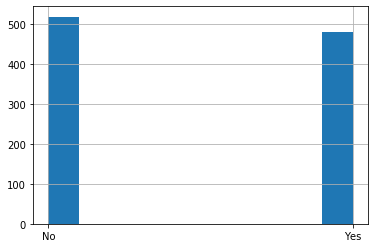

In [16]:
data['Purchased Bike'].hist()

````{Dropdown} Lösung Task 12

  ```{code-block} python
  data['Purchased Bike'].hist()
  ```
  
  Die Anzahl der Datensätze pro Klasse sind nahezu gleichverteilt.
````

### Task 13: Erstellen der Datensets

Erstellen Sie die Datensets für Training, Validierung und Test mit Hilfe der Methode train_test_split aus der Scikit-Learn-Bibliothek. Folgende Eigenschaften sollen die Datensets besitzen:
* disjunkt
* 60% Trainingsdaten, 20% Validierungsdaten, 20% Testdaten
* reproduzierbar
* gleiche Verteilung der Datensätze pro Klasse in jedem Datenset

In [17]:
X = data.drop(['Purchased Bike'], axis=1)
y = data['Purchased Bike']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

```{tip}
Der bestehende Pandas Datenframe muss vor dem Aufruf der train_test_split-Methode in Merkmale und Label zerlegt werden. Mit der [Drop-Methode](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) lassen sich einzelne Spalten aus einem Datenframe entfernen.
```

````{Dropdown} Lösung Task 12

  ```{code-block} python
    X = data.drop(['Purchased Bike'], axis=1)
    y = data['Purchased Bike']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)
  ```
````

### Task 14: Anzahl der Datensätze pro Datensets ausgeben

Geben Sie die Gesamtanzahl der Datensätze und die Anzahl der Datensätze pro Datenset aus.

In [18]:
print('Anzahl der Datensätze')
print('* Gesamt: ', X.shape[0])   
print('* Trainingsdatenset:', X_train.shape[0])
print('* Validierungsdatenset:', X_val.shape[0])
print('* Testdatenset:', X_test.shape[0])

Anzahl der Datensätze
* Gesamt:  1000
* Trainingsdatenset: 600
* Validierungsdatenset: 200
* Testdatenset: 200


````{Dropdown} Lösung Task 14

  ```{code-block} python
    print('Anzahl der Datensätze')
    print('* Gesamt: ', X.shape[0])   
    print('* Trainingsdatenset:', X_train.shape[0])
    print('* Validierungsdatenset:', X_val.shape[0])
    print('* Testdatenset:', X_test.shape[0])
  ```
````

### Task 15: Verteilung der Daten pro Klasse

Geben Sie die Anzahl der Daten pro Klasse in Prozent für die  
* gesamten Daten (Datenbasis vor der Splittung in die Datensets)  
* Trainingsdaten   
an.

In [19]:
print('Gesamte Datenbasis')
print(y.value_counts()/y.shape[0])
print()
print('Trainingsdaten')
print(y_train.value_counts()/y_train.shape[0])

Gesamte Datenbasis
No     0.519
Yes    0.481
Name: Purchased Bike, dtype: float64

Trainingsdaten
No     0.518333
Yes    0.481667
Name: Purchased Bike, dtype: float64


````{Dropdown} Lösung Task 15

  ```{code-block} python
    print('Gesamte Datenbasis')
    print(y.value_counts()/y.shape[0])
    print()
    print('Trainingsdaten')
    print(y_train.value_counts()/y_train.shape[0])
  ```
````

### Task 16: Ergebnis speichern

Erstellen Sie ein Python Dictionary mit den Keys
* X_train
* y_train
* X_val
* y_val
* X_test
* y_test

in einer neuen Variable namens "dataset" und speichern das Dictionary unter '../output/datasets.pkl' ab.

In [20]:
datasets = {
    'X_train': X_train,
    'y_train': y_train,
    'X_val': X_val,
    'y_val': y_val,
    'X_test': X_test,
    'y_test': y_test
}

with open('../output/bikebuyers/datasets.pkl', 'wb') as handle:
    pickle.dump(datasets, handle)

```{Tip}
Die [dump-Methode](https://docs.python.org/3/library/pickle.html) ermöglicht eine einfache Speicherung von Python Objekten im .pkl-Format
```

````{Dropdown} Lösung Task 15

  ```{code-block} python
        datasets = {
        'X_train': X_train,
        'y_train': y_train,
        'X_val': X_val,
        'y_val': y_val,
        'X_test': X_test,
        'y_test': y_test
    }

    with open('../output/datasets.pkl', 'wb') as handle:
        pickle.dump(datasets, handle)
  ```
````

### Task 17: Einlesen und Ausgabe der Validierungsmerkmale

Lesen Sie das gespeicherte Datenset aus der pickle-Datei aus und geben Sie die ersten 5 Zeilen der Validierungsmerkmale aus.

In [21]:
with open('../output/bikebuyers/datasets.pkl', 'rb') as handle:
    datasets = pickle.load(handle)

datasets['X_val'].head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age
350,27878,Single,Male,20000.0,0.0,Partial College,Manual,No,0.0,0-1 Miles,Pacific,28.0
356,23608,Married,Female,150000.0,3.0,High School,Professional,Yes,3.0,0-1 Miles,Europe,51.0
756,27261,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,No,1.0,0-1 Miles,North America,36.0
990,14332,Single,Female,30000.0,0.0,High School,Skilled Manual,No,2.0,5-10 Miles,North America,26.0
791,18363,Married,Male,40000.0,0.0,High School,Skilled Manual,Yes,2.0,5-10 Miles,North America,28.0


```{Tip}
Die [load-Methode](https://docs.python.org/3/library/pickle.html) ermöglicht das Auslesen von Inhalten aus .pkl-Dateien
```

````{Dropdown} Lösung Task 15

  ```{code-block} python
    with open('datasets.pickle', 'rb') as handle:
        datasets = pickle.load(handle)

    datasets['X_val'].head()
  ```
````
